In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

### Goal: plot submicroscopic fraction in different archetypes/core scenarios to see if this could help explain variations in how effect IST vs IPT is

In [3]:
df1 = pd.read_csv("sim_data_1bf26942-aecc-ec11-a9f8-b88303911bc1.csv")
df2 = pd.read_csv("sim_data_e17e6275-aecc-ec11-a9f8-b88303911bc1.csv")

In [4]:
df = pd.concat([df1,df2])
df

,true_prev,rdt_prev,new_cases,days,archetype,baseline_eir,Run_Number,scenario_number
0,0.335475,0.179281,14,0,Central,1,0,13
1,0.339554,0.179410,12,1,Central,1,0,13
2,0.342031,0.181052,9,2,Central,1,0,13
3,0.344308,0.183096,12,3,Central,1,0,13
4,0.347119,0.184702,12,4,Central,1,0,13
...,...,...,...,...,...,...,...,...
43795,0.789581,0.392033,10,725,Sahel,30,3,30
43796,0.787538,0.389785,18,726,Sahel,30,3,30
43797,0.783248,0.384883,18,727,Sahel,30,3,30
43798,0.779820,0.385621,20,728,Sahel,30,3,30


In [5]:
set(df["scenario_number"])

{13, 22, 30}

In [26]:
df["frac_infected_detected"] = df["rdt_prev"]/df["true_prev"]
df["frac_infected_undetected"] = 1-df["rdt_prev"]/df["true_prev"]

(array([  544.,  1512., 11543., 31370., 43107., 26658., 11773.,  3787.,
          926.,   180.]),
 array([0.04347826, 0.13379236, 0.22410646, 0.31442056, 0.40473466,
        0.49504876, 0.58536286, 0.67567696, 0.76599106, 0.85630516,
        0.94661926]),
 <BarContainer object of 10 artists>)

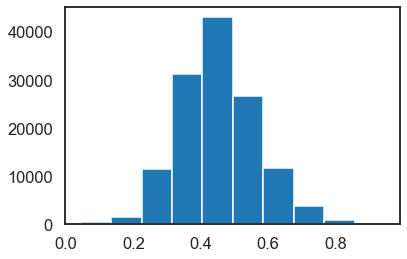

In [27]:
plt.hist(df["frac_infected_detected"])

In [28]:
foo = df[["archetype","frac_infected_detected", "baseline_eir"]].reset_index(drop=True)

<AxesSubplot:xlabel='frac_infected_detected', ylabel='Count'>

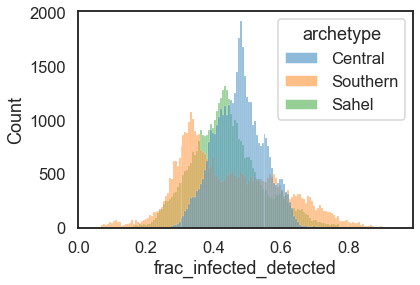

In [29]:
sns.histplot(data=foo, x="frac_infected_detected", hue="archetype")

<AxesSubplot:xlabel='frac_infected_detected', ylabel='Count'>

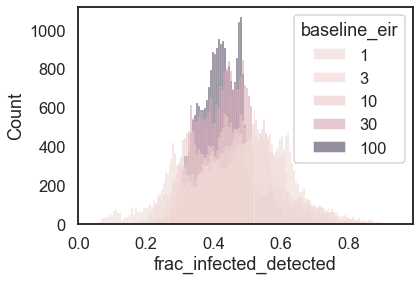

In [30]:
sns.histplot(data=foo, x="frac_infected_detected", hue="baseline_eir")

In [35]:
bar = df.groupby(["archetype","baseline_eir","scenario_number","days"]).agg({"rdt_prev": "mean", 
                                                                             "true_prev": "mean",
                                                                             "frac_infected_undetected": "mean",
                                                                             "frac_infected_detected": "mean"}).reset_index()
bar

,archetype,baseline_eir,scenario_number,days,rdt_prev,true_prev,frac_infected_undetected,frac_infected_detected
0,Central,1,13,0,0.179281,0.335826,0.466148,0.533852
1,Central,1,13,1,0.179482,0.339239,0.470927,0.529073
2,Central,1,13,2,0.181056,0.341683,0.470103,0.529897
3,Central,1,13,3,0.183064,0.344243,0.468212,0.531788
4,Central,1,13,4,0.184661,0.347488,0.468583,0.531417
...,...,...,...,...,...,...,...,...
32845,Southern,100,30,725,0.189284,0.503929,0.624523,0.375477
32846,Southern,100,30,726,0.188063,0.502869,0.626171,0.373829
32847,Southern,100,30,727,0.188804,0.502523,0.624420,0.375580
32848,Southern,100,30,728,0.187973,0.501707,0.625452,0.374548


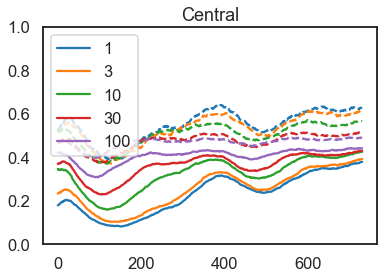

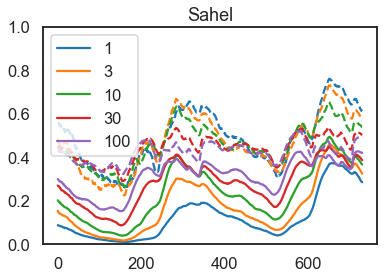

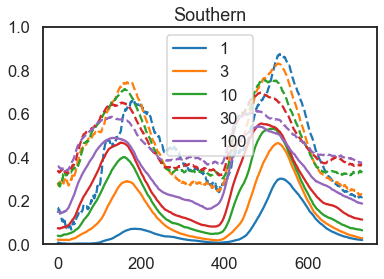

In [34]:
# Plot submicroscopic fraction for each archetype, as eir increases
color_dict = {1: "C0",
              3: "C1",
              10: "C2",
              30: "C3",
              100: "C4"}

bar_base = bar[bar["scenario_number"]==30].reset_index(drop=True)
for a, sdf in bar_base.groupby(["archetype"]):
    plt.figure()
    for e, ssdf in sdf.groupby(["baseline_eir"]):
        plt.plot(ssdf["days"], ssdf["rdt_prev"], label=e, c=color_dict[e])
        plt.plot(ssdf["days"], ssdf["frac_infected_detected"], label=None, c=color_dict[e], linestyle='dashed')
    plt.legend()
    # sns.histplot(data=sdf, x="frac_submicroscopic", hue="baseline_eir")
    plt.title(a)
    plt.ylim([0,1])

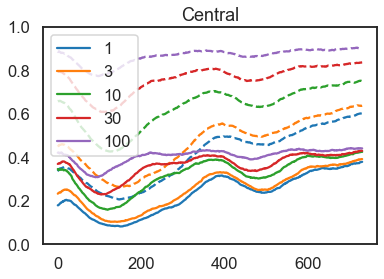

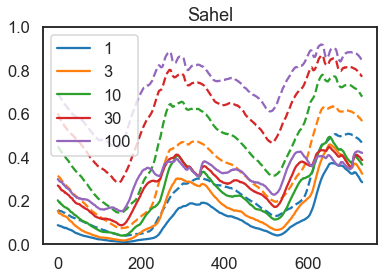

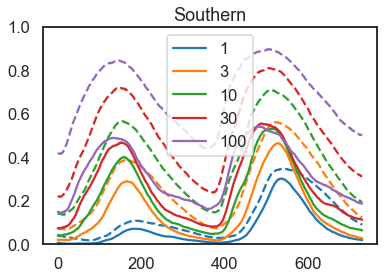

In [36]:
# Plot true vs rdt prev for each archetype, as eir increases
color_dict = {1: "C0",
              3: "C1",
              10: "C2",
              30: "C3",
              100: "C4"}

bar_base = bar[bar["scenario_number"]==30].reset_index(drop=True)
for a, sdf in bar_base.groupby(["archetype"]):
    plt.figure()
    for e, ssdf in sdf.groupby(["baseline_eir"]):
        plt.plot(ssdf["days"], ssdf["rdt_prev"], label=e, c=color_dict[e])
        plt.plot(ssdf["days"], ssdf["true_prev"], label=None, c=color_dict[e], linestyle='dashed')
    plt.legend()
    # sns.histplot(data=sdf, x="frac_submicroscopic", hue="baseline_eir")
    plt.title(a)
    plt.ylim([0,1])

Baseline EIR of 1
Archetype Central: mean detected-ratio = 0.5478166592801808
Archetype Sahel: mean detected-ratio = 0.48730258670266563
Archetype Southern: mean detected-ratio = 0.43029514244724604
Baseline EIR of 3
Archetype Central: mean detected-ratio = 0.5295331743758482
Archetype Sahel: mean detected-ratio = 0.4656402049129078
Archetype Southern: mean detected-ratio = 0.46558019183524596
Baseline EIR of 10
Archetype Central: mean detected-ratio = 0.504282467476227
Archetype Sahel: mean detected-ratio = 0.45887799458425843
Archetype Southern: mean detected-ratio = 0.4750321748325986
Baseline EIR of 30
Archetype Central: mean detected-ratio = 0.4734911716628763
Archetype Sahel: mean detected-ratio = 0.4423563417324324
Archetype Southern: mean detected-ratio = 0.47633735208387984
Baseline EIR of 100
Archetype Central: mean detected-ratio = 0.4678667719666134
Archetype Sahel: mean detected-ratio = 0.42261605660654067
Archetype Southern: mean detected-ratio = 0.4687933426191448


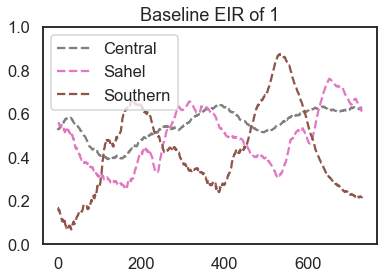

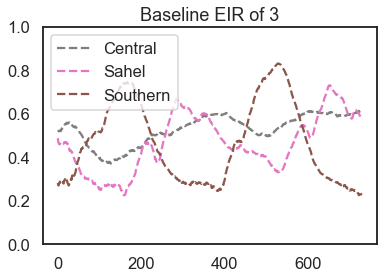

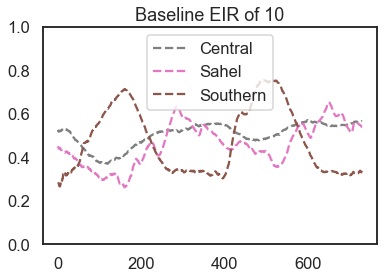

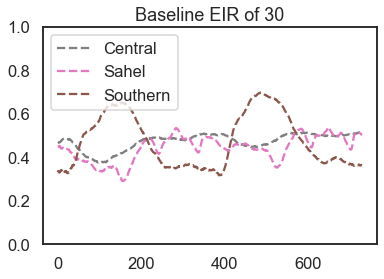

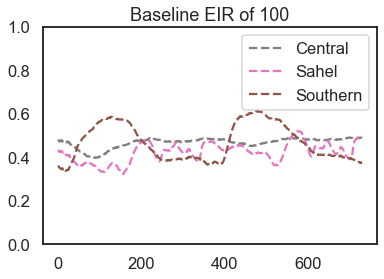

In [50]:
# Plot submicroscopic fraction for each eir, with color as archetype
color_dict = {"Southern": "C5",
              "Sahel": "C6",
              "Central": "C7"}

bar_base = bar[bar["scenario_number"]==30].reset_index(drop=True)
for e, sdf in bar_base.groupby(["baseline_eir"]):
    print(f"Baseline EIR of {e}")
    plt.figure()
    for a, ssdf in sdf.groupby(["archetype"]):
        # plt.plot(ssdf["days"], ssdf["rdt_prev"], label=a, c=color_dict[a])
        plt.plot(ssdf["days"], ssdf["frac_infected_detected"], label=a, c=color_dict[a], linestyle='dashed')
        x = ssdf["frac_infected_detected"].mean()
        print(f"Archetype {a}: mean detected-ratio = {x}")
    plt.legend()
    plt.title(f"Baseline EIR of {e}")
    plt.ylim([0,1])
    
        